# COVID-19 Status (Colombia)

##### Limpieza y ajuste de datos (Desarrollador)*

In [1]:
# Libraries import
from datetime import datetime
from plotly.offline import init_notebook_mode, iplot
import requests
import pandas as pd
import numpy as np
import plotly.graph_objs as go
from googletrans import Translator
import matplotlib.pyplot as plt
import statsmodels.api as sn

In [2]:
# Dataset import - 'Datos abiertos COVID-19 (Colombia)'
data = pd.DataFrame.from_dict(requests.get('https://www.datos.gov.co/resource/gt2j-8ykr.json?$limit=999999999').json())
#data

In [3]:
# Data cleaning and adjusting

# FE DE ERRATAS (2020-05-03): --------------------------------------------------------------------------------------------------------------------------------------------------
#data.loc[(data['Edad'].str.contains('-   -'))] = None
    
data = data[~data['edad'].str.contains('-   -')]
#---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

#translator = Translator()

data.columns = ['Id de caso', 'Fecha de notificación', 'Código DIVIPOLA', 'Ciudad de ubicación', 'Departamento', 'Estado', 'Edad', 'Sexo', 'Tipo', 'Severidad','País de procedencia', 'Fecha de inicio de síntomas', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web', 'Tipo de recuperación', 'Código departamento', 'Código país', 'Pertenecia Étnica', 'Fecha de defunción', 'Nombre Grupo Étnico']

for column in ['Ciudad de ubicación', 'Estado', 'Sexo', 'Tipo', 'Severidad', 'País de procedencia']:
    data[column] = data[column].str.capitalize()
    
for column in ['Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de defunción', 'Fecha de diagnóstico', 'Fecha de recuperación', 'Fecha de reporte web']:
       data[column] = data[column].str.slice(0,10).replace(r'(\d+)-(\d+)-(\d+)', r'\1-\2-\3', regex=True).apply(lambda x: pd.to_datetime(x, dayfirst=True, errors='ignore'))

data.loc[(data['Edad'].str.contains('[a-zA-Z]+', regex=True)), 'Edad'] = 0
data['Clasificación de edad'] = pd.cut(x=data['Edad'].apply(lambda x: float(x)), bins=[-np.inf,10,20,30,40,50,60,70,80,90,np.inf], include_lowest=True, labels=['0 - 10', '10 - 20', '20 - 30', '30 - 40', '40 - 50', '50 - 60', '60 - 70', '70 - 80', '80 - 90', '90 - 100+'])

#data['País de procedencia'] = data['País de procedencia'].apply(Translator().translate, src='es', dest='en').apply(getattr, args=('text',))

data = data[['Id de caso', 'Fecha de reporte web', 'Fecha de diagnóstico', 'Fecha de notificación', 'Fecha de inicio de síntomas', 'Fecha de recuperación', 'Fecha de defunción', 'Ciudad de ubicación', 'Departamento', 'Severidad', 'Estado', 'Edad', 'Clasificación de edad', 'Sexo', 'Pertenecia Étnica', 'Nombre Grupo Étnico', 'Tipo', 'Tipo de recuperación', 'País de procedencia', 'Código departamento', 'Código país', 'Código DIVIPOLA']]
data = data.set_index('Id de caso')

date = datetime.today().strftime('%Y-%m-%d')
data.to_csv(f'./Datasets/COVID-19 Status (Colombia) [{date}].csv', index = True)

def numbers(div):
    for i in range(0, len(ax.patches)//div, 1):
        height = 0
        for j in range(0, div, 1):
            height += ax.patches[j*(len(ax.patches)//div)+i].get_height()
        ax.text(ax.patches[i].get_x()+(ax.patches[i].get_width()/10),height+(height/100)+10, int(height), fontsize=7, color='dimgrey', rotation=90)

def numbers_H(div):
    for i in range(0, len(ax.patches)//div, 1):
        width = 0
        for j in range(0, div, 1):
            width += ax.patches[j*(len(ax.patches)//div)+i].get_width()
        ax.text(width+(width/100)+10,ax.patches[i].get_y()+(ax.patches[i].get_height()/10), int(width), fontsize=7, color='dimgrey', rotation=0)

In [4]:
# Test

#data['País de procedencia'].unique().apply(lambda x: Translator().translate(x, src='es', dest='en').text)
#Translator().translate('España', src='es', dest='en').text

In [5]:
# In-line plots libraries import

%matplotlib inline
init_notebook_mode(connected = True)

## Análisis Dataset - COVID-19 (Colombia)

### - Datos Abiertos COVID-19 (Colombia)

In [6]:
data

Fecha de reporte web Fecha de diagnóstico Fecha de notificación  \
Id de caso                                                                   
1                    2020-03-06           2020-03-06            2020-03-02   
2                    2020-03-09           2020-03-09            2020-03-06   
3                    2020-03-09           2020-03-09            2020-03-07   
4                    2020-03-11           2020-03-11            2020-03-09   
5                    2020-03-11           2020-03-11            2020-03-09   
...                         ...                  ...                   ...   
387517               2020-08-09           2020-08-07            2020-07-31   
387518               2020-08-09           2020-08-07            2020-07-31   
387519               2020-08-09           2020-08-07            2020-07-31   
387520               2020-08-09           2020-08-07            2020-07-31   
387521               2020-08-09           2020-07-22            2020-07-01   

           Fecha de inicio de síntomas Fecha de recuperación  \
Id de caso                                                     
1                  2020-02-27 00:00:00            2020-03-13   
2                  2020-03-04 00:00:00            2020-03-19   
3                  2020-02-29 00:00:00            2020-03-15   
4                  2020-03-06 00:00:00            2020-03-26   
5                  2020-03-08 00:00:00            2020-03-23   
...                                ...                   ...   
387517             2020-07-31 00:00:00                   NaT   
387518             2020-07-31 00:00:00                   NaT   
387519             2020-07-31 00:00:00                   NaT   
387520             2020-07-31 00:00:00                   NaT   
387521             2020-07-01 00:00:00                   NaT   

           Fecha de defunción  Ciudad de ubicación     Departamento Severidad  \
Id de caso                                                                      
1                         NaT          Bogotá d.c.      Bogotá D.C.      Leve   
2                         NaT  Guadalajara de buga  Valle del Cauca      Leve   
3                         NaT             Medellín        Antioquia      Leve   
4                         NaT             Medellín        Antioquia      Leve   
5                         NaT             Medellín        Antioquia      Leve   
...                       ...                  ...              ...       ...   
387517                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
387518                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
387519                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
387520                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   
387521                    NaT          Bogotá d.c.      Bogotá D.C.      Leve   

                Estado  ... Clasificación de edad Sexo Pertenecia Étnica  \
Id de caso              ...                                                
1           Recuperado  ...               10 - 20    F              Otro   
2           Recuperado  ...               30 - 40    M              Otro   
3           Recuperado  ...               40 - 50    F              Otro   
4           Recuperado  ...               50 - 60    M              Otro   
5           Recuperado  ...               20 - 30    M              Otro   
...                ...  ...                   ...  ...               ...   
387517            Casa  ...                0 - 10    M               NaN   
387518            Casa  ...               20 - 30    M               NaN   
387519            Casa  ...               30 - 40    F               NaN   
387520            Casa  ...               50 - 60    M               NaN   
387521            Casa  ...               40 - 50    F               NaN   

           Nombre Grupo Étnico         Tipo Tipo de recuperación  \
Id de caso                                          

### - Mapa de influencia - COVID-19 (Colombia) [Beta]

In [7]:
map_data = dict(
    type = 'choropleth',
    locations = data['País de procedencia'],
    locationmode = 'country names',
    colorscale = 'viridis',
    z = data['País de procedencia'].value_counts().tolist())

geo_map = go.Figure(data=[map_data])
iplot(geo_map)

### - Casos confirmados VS Departamento (Sexo)

In [8]:
data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0)

Sexo                                                    F      M
Departamento                                                    
Amazonas                                             1104   1495
Antioquia                                           23365  26582
Arauca                                                116    332
Archipiélago de San Andrés Providencia y Santa ...     19     30
Atlántico                                           11990  13302
Barranquilla D.E.                                   15323  17569
Bogotá D.C.                                         66068  67355
Bolívar                                              1359   1710
Boyacá                                                726    814
Buenaventura D.E.                                     816   1395
Caldas                                                653    659
Caquetá                                              1176   1317
Cartagena D.T. y C.                                  7822   9385
Casanare                                              197    254
Cauca                                                1180   1474
Cesar                                                1967   2499
Chocó                                                1456   1741
Cundinamarca                                         5960   5868
Córdoba                                              4782   4834
Guainía                                                 6      8
Guaviare                                               16    133
Huila                                                 795    819
La Guajira                                           1322   1409
Magdalena                                            1285   1347
Meta                                                 1201   2718
Nariño                                               4513   5131
Norte de Santander                                   2031   2653
Putumayo                                              636    786
Quindío                                               257    253
Risaralda                                            1320   1295
Santa Marta D.T. y C.                                2779   2849
Santander                                            2786   3927
Sucre                                                3499   3949
Tolima                                               1257   2311
Valle del Cauca                                     13977  15453
Vaupés                                                 27     34
Vichada                                                 1      4

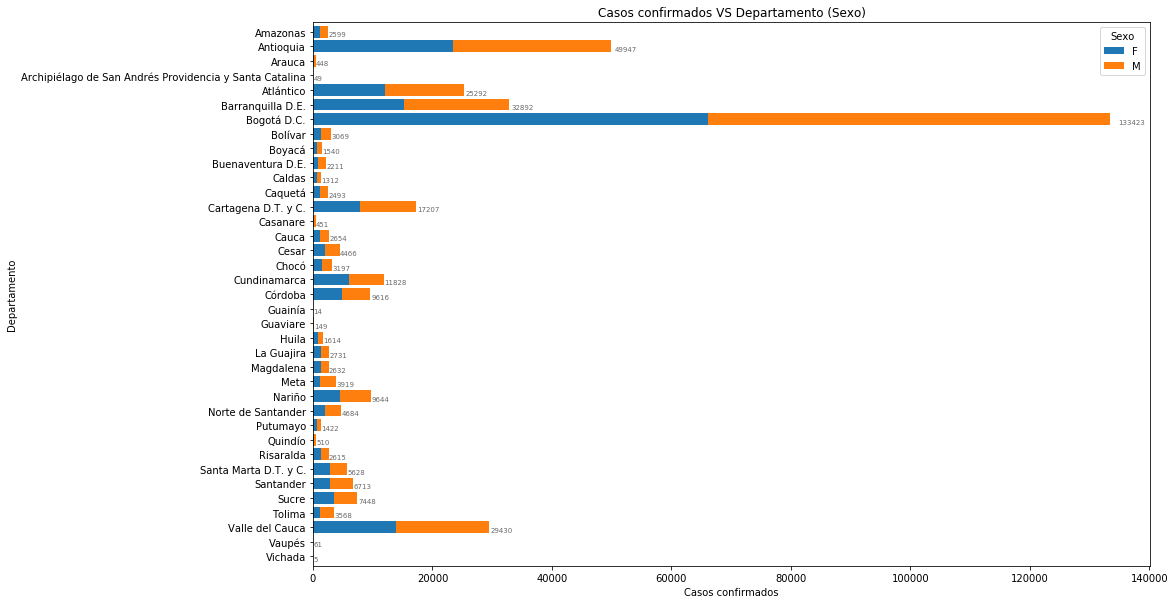

In [9]:
ax = data.groupby(['Departamento', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Clasificación de edad)

In [10]:
data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad                               0 - 10  10 - 20  20 - 30  \
Departamento                                                                   
Amazonas                                               139      464      525   
Antioquia                                             1673     3399    13035   
Arauca                                                  18       69      151   
Archipiélago de San Andrés Providencia y Santa ...       0        1       14   
Atlántico                                             1147     2013     5360   
Barranquilla D.E.                                     1286     2189     7147   
Bogotá D.C.                                           5961    10191    30573   
Bolívar                                                156      289      700   
Boyacá                                                  82      151      313   
Buenaventura D.E.                                       48      287      511   
Caldas                                                  54       98      291   
Caquetá                                                 73      159      685   
Cartagena D.T. y C.                                    811     1283     3898   
Casanare                                                20       22      131   
Cauca                                                  112      211      624   
Cesar                                                  264      392     1066   
Chocó                                                  137      281      766   
Cundinamarca                                           556      912     2756   
Córdoba                                                302      575     1961   
Guainía                                                  0        2        4   
Guaviare                                                 1       36       46   
Huila                                                   71      146      373   
La Guajira                                             151      260      567   
Magdalena                                              142      188      488   
Meta                                                    90      311     1176   
Nariño                                                 422      788     2259   
Norte de Santander                                     130      250     1068   
Putumayo                                                41      127      413   
Quindío                                                 18       28      124   
Risaralda                                              152      237      607   
Santa Marta D.T. y C.                                  236      399     1233   
Santander                                              233      417     1531   
Sucre                                                  297      620     1537   
Tolima                                                 162      222      938   
Valle del Cauca                                        968     1917     6751   
Vaupés                                                   4        5       19   
Vichada                                                  0        4        0   

Clasificación de edad                               30 - 40  40 - 50  50 - 60  \
Departamento                                                                    
Amazonas                                                501      350      287   
Antioquia                                             12597     7730     5995   
Arauca                                                  116       44       32   
Archipiélago de San Andrés Providencia y Santa ...       13       11        5   
Atlántico                                              5802     4031     3360   
Barranquilla D.E.                                      7763     5156     4416   
Bogotá D.C.                                           29515    21497    18091   
Bolívar                                                 710      427      285   
Boyacá                                                  305      253 

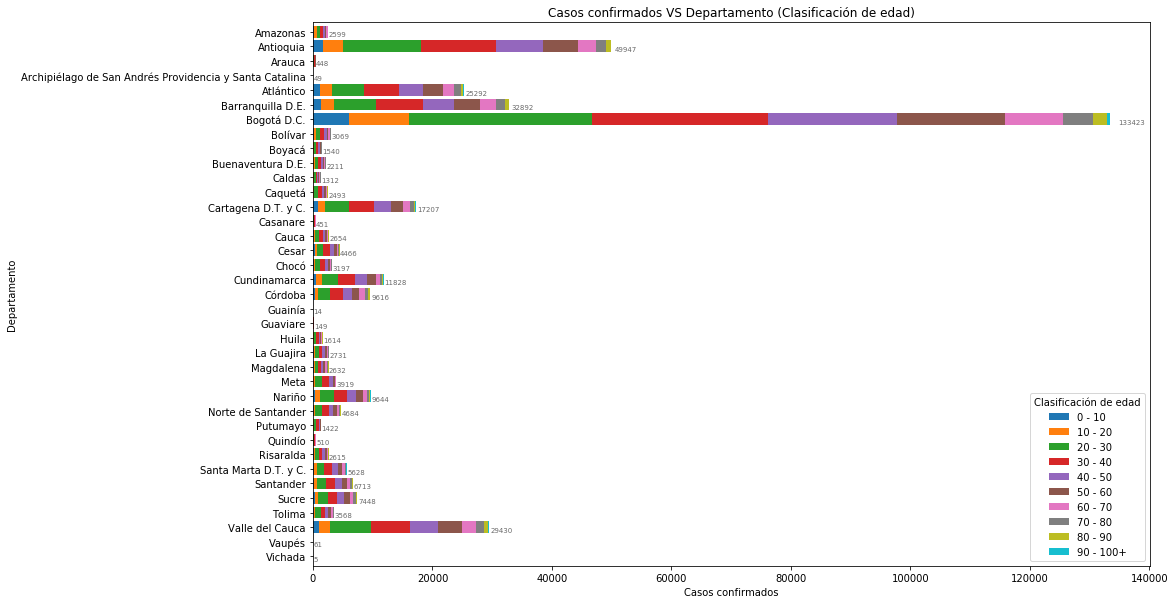

In [11]:
ax = data.groupby(['Departamento', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Departamento (Estado)

In [12]:
data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0)

Estado                                                 Casa  Fallecido  \
Departamento                                                             
Amazonas                                              115.0      104.0   
Antioquia                                           25017.0      878.0   
Arauca                                                241.0        8.0   
Archipiélago de San Andrés Providencia y Santa ...     10.0        0.0   
Atlántico                                            4470.0     1139.0   
Barranquilla D.E.                                    4491.0     1541.0   
Bogotá D.C.                                         59820.0     3668.0   
Bolívar                                               866.0      139.0   
Boyacá                                                726.0       37.0   
Buenaventura D.E.                                     170.0      150.0   
Caldas                                                789.0       17.0   
Caquetá                                              1565.0       59.0   
Cartagena D.T. y C.                                  2333.0      484.0   
Casanare                                              217.0        7.0   
Cauca                                                 967.0       92.0   
Cesar                                                1951.0       97.0   
Chocó                                                 360.0      114.0   
Cundinamarca                                         4356.0      320.0   
Córdoba                                              4106.0      820.0   
Guainía                                                 0.0        1.0   
Guaviare                                               85.0        0.0   
Huila                                                 825.0       36.0   
La Guajira                                            782.0      145.0   
Magdalena                                             554.0      237.0   
Meta                                                 1473.0       57.0   
Nariño                                               2798.0      335.0   
Norte de Santander                                   2563.0      246.0   
Putumayo                                              732.0       63.0   
Quindío                                               232.0       13.0   
Risaralda                                            1424.0       51.0   
Santa Marta D.T. y C.                                1984.0      196.0   
Santander                                            3596.0      236.0   
Sucre                                                1985.0      395.0   
Tolima                                               1398.0       80.0   
Valle del Cauca                                      9315.0     1076.0   
Vaupés                                                  1.0        1.0   
Vichada                                                 3.0        0.0   

Estado                                              Hospital  Hospital uci  \
Departamento                                                                 
Amazonas                                                 8.0           4.0   
Antioquia                                             1811.0         176.0   
Arauca                                                  17.0           4.0   
Archipiélago de San Andrés Providencia y Santa ...       4.0           1.0   
Atlántico                                              552.0          72.0   
Barranquilla D.E.                                      710.0          56.0   
Bogotá D.C.                                           6556.0         405.0   
Bolívar                                                119.0          14.0   
Boyacá                                                  94.0           9.0   
Buenaventura D.E.                                      118.0          17.0   
Caldas                                                  57.0           8.0   
Caquetá                                                166.0           8.0   
Cartagena D.T. y C.  

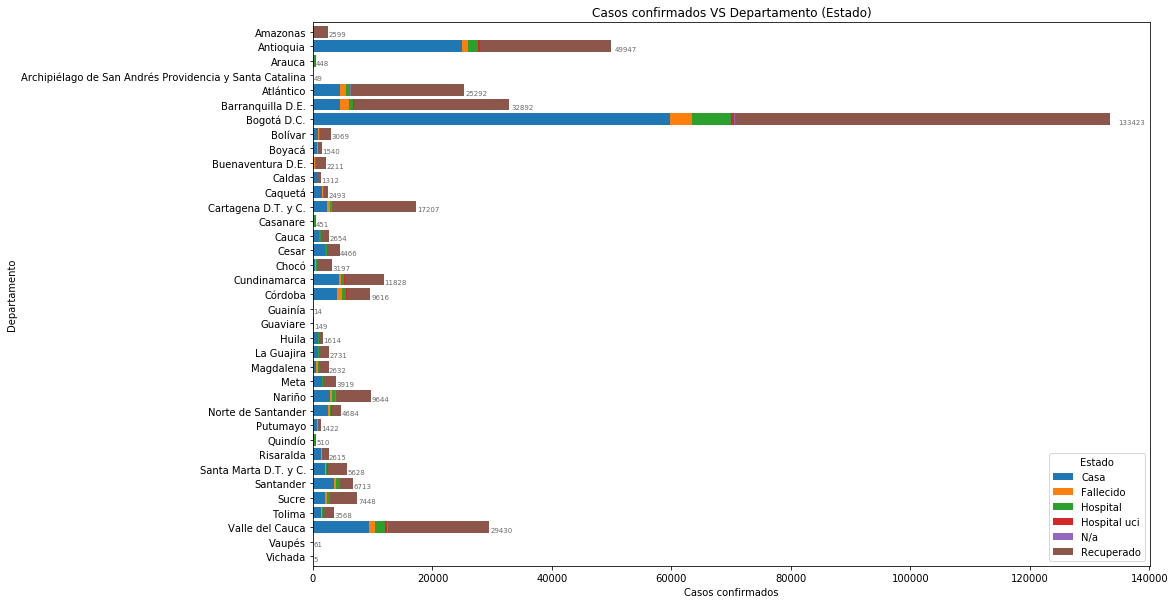

In [13]:
ax = data.groupby(['Departamento', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Departamento (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Sexo)

In [14]:
data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0)

Sexo               F       M
Estado                      
Casa           69818   72502
Fallecido       4640    8202
Hospital        7335    9894
Hospital uci     553    1039
N/a              342     468
Recuperado    101099  111589

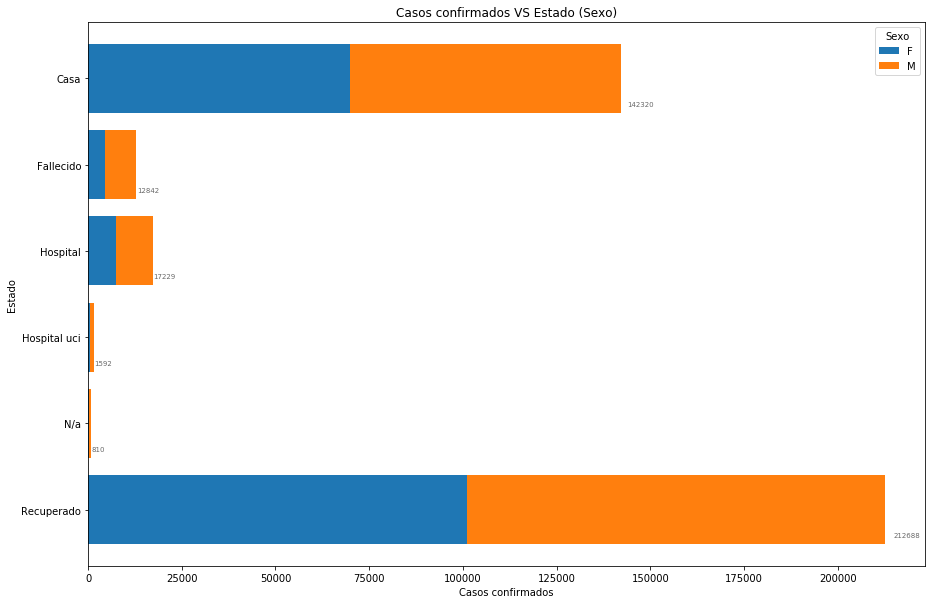

In [15]:
ax = data.groupby(['Estado', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Estado (Clasificación de edad)

In [16]:
data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Estado                                                                       
Casa                     5848    11091    35037    34865    23256    17914   
Fallecido                  27       22      175      435      982     1937   
Hospital                  683      358     1273     2011     2528     3617   
Hospital uci               67       24       59      136      231      384   
N/a                        23       16       39       31       60       98   
Recuperado               9309    17432    53058    52270    34071    25894   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Estado                                                       
Casa                      8542     3962     1533        272  
Fallecido                 3096     3263     2359        546  
Hospital                  3339     2213     1064        143  
Hospital uci               360      253       72          6  
N/a                        163      181      155         44  
Recuperado               12667     5479     2170        338

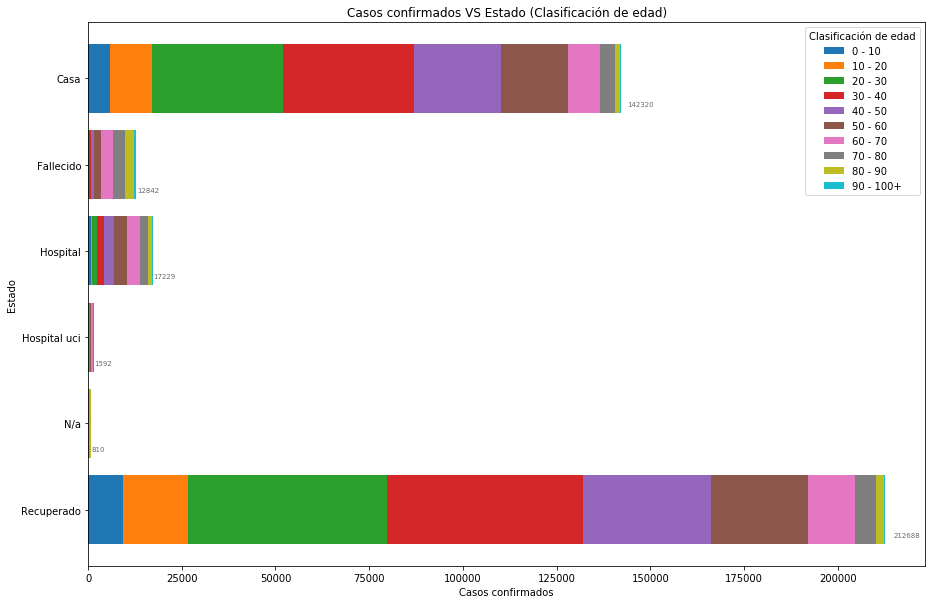

In [17]:
ax = data.groupby(['Estado', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Estado (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo de contagio (Sexo)

In [18]:
data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0)

Sexo              F       M
Tipo                       
En estudio   176600  186658
Importado       459     524
Relacionado    6728   16512

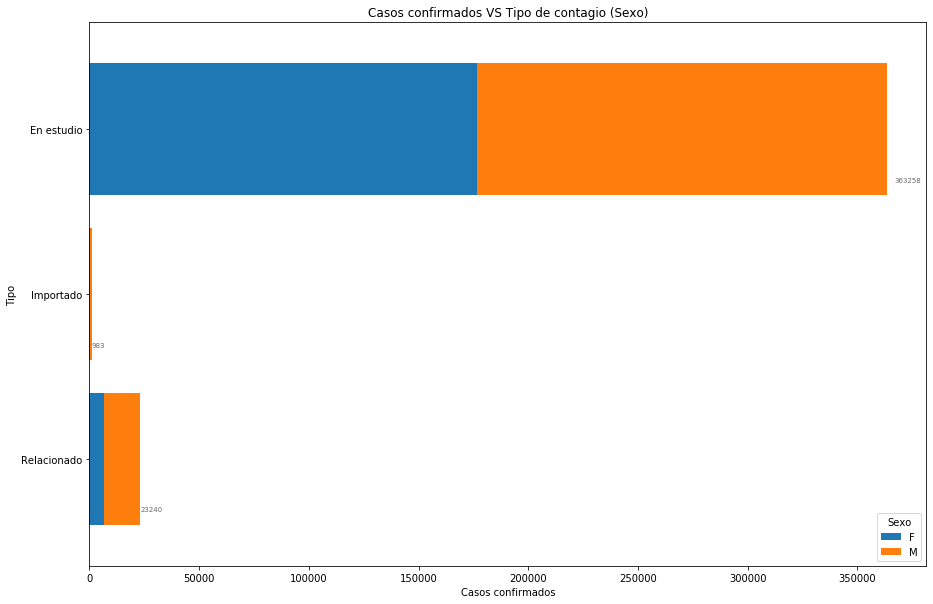

In [19]:
ax = data.groupby(['Tipo', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo de contagio (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Tipo (Clasificación de edad)

In [20]:
data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Tipo                                                                         
En estudio              15010    26081    82803    83735    57924    47565   
Importado                   5       38      246      230      173      152   
Relacionado               942     2824     6592     5783     3031     2127   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Tipo                                                         
En estudio               27005    14811     7043       1281  
Importado                   94       35        9          1  
Relacionado               1068      505      301         67

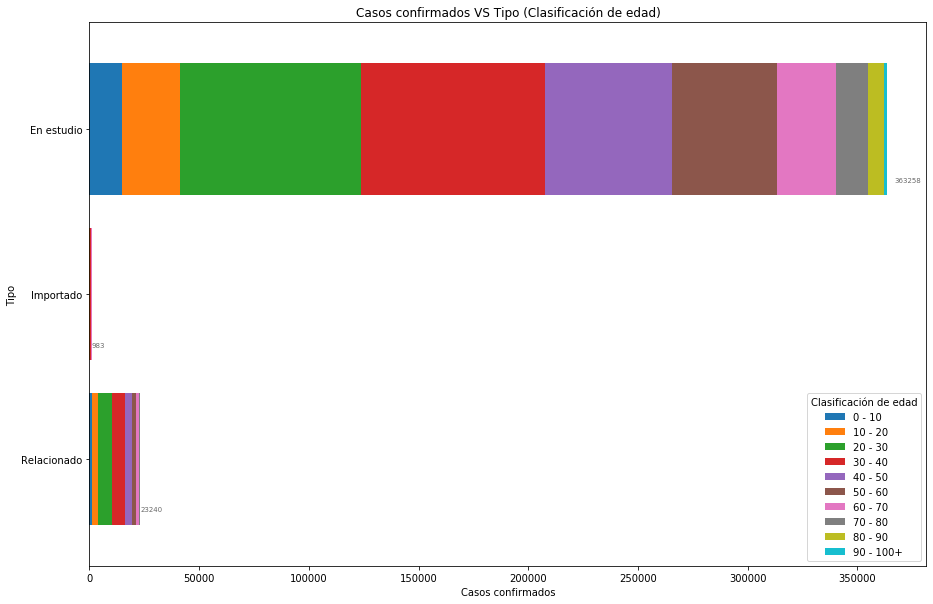

In [21]:
ax = data.groupby(['Tipo', 'Clasificación de edad']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Tipo (Clasificación de edad)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Sexo)

In [22]:
data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0)

Sexo                       F      M
Clasificación de edad              
0 - 10                  7796   8161
10 - 20                13520  15423
20 - 30                43586  46055
30 - 40                41872  47876
40 - 50                29054  32074
50 - 60                23514  26330
60 - 70                13018  15149
70 - 80                 6991   8360
80 - 90                 3668   3685
90 - 100+                768    581

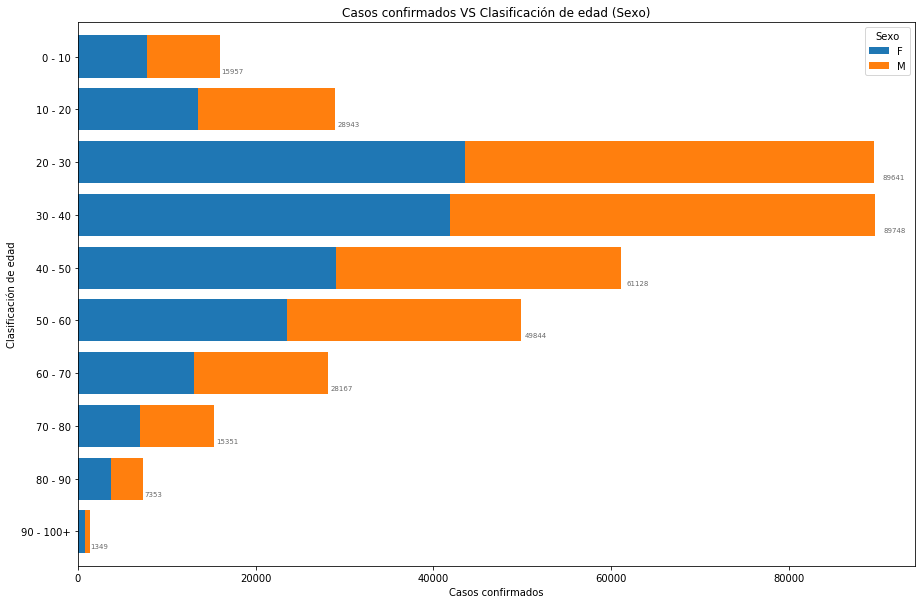

In [23]:
ax = data.groupby(['Clasificación de edad', 'Sexo']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Sexo)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers_H(div)

### - Casos confirmados VS Clasificación de edad (Estado)

In [24]:
data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Clasificación de edad                                                  
0 - 10                  5848         27       683            67   23   
10 - 20                11091         22       358            24   16   
20 - 30                35037        175      1273            59   39   
30 - 40                34865        435      2011           136   31   
40 - 50                23256        982      2528           231   60   
50 - 60                17914       1937      3617           384   98   
60 - 70                 8542       3096      3339           360  163   
70 - 80                 3962       3263      2213           253  181   
80 - 90                 1533       2359      1064            72  155   
90 - 100+                272        546       143             6   44   

Estado                 Recuperado  
Clasificación de edad              
0 - 10                       9309  
10 - 20                     17432  
20 - 30                     53058  
30 - 40                     52270  
40 - 50                     34071  
50 - 60                     25894  
60 - 70                     12667  
70 - 80                      5479  
80 - 90                      2170  
90 - 100+                     338

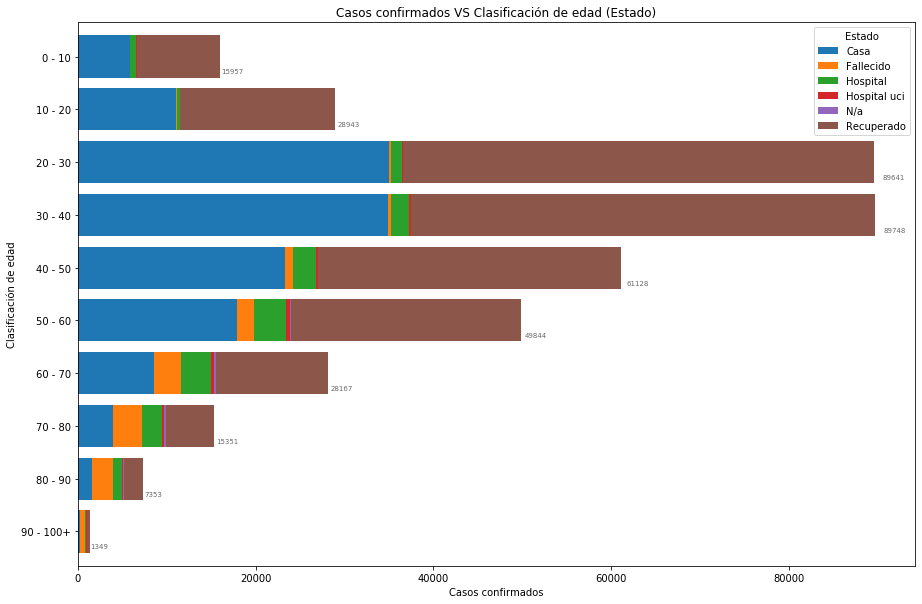

In [25]:
ax = data.groupby(['Clasificación de edad', 'Estado']).size().unstack().fillna(0).sort_index(ascending=False).plot(kind='barh', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Clasificación de edad (Estado)'))
ax.set_xlabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers_H(div)

### - Casos confirmados VS Fecha de diagnóstico (Sexo)

In [26]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0)

Sexo                       F       M
Fecha de diagnóstico                
2020-03-06               1.0     0.0
2020-03-09               1.0     1.0
2020-03-11               4.0     2.0
2020-03-12               5.0     0.0
2020-03-13               2.0     3.0
...                      ...     ...
2020-08-05            5029.0  4960.0
2020-08-06            4279.0  4336.0
2020-08-07            3577.0  3632.0
2020-08-08            2532.0  2881.0
2020-08-09              55.0    40.0

[154 rows x 2 columns]

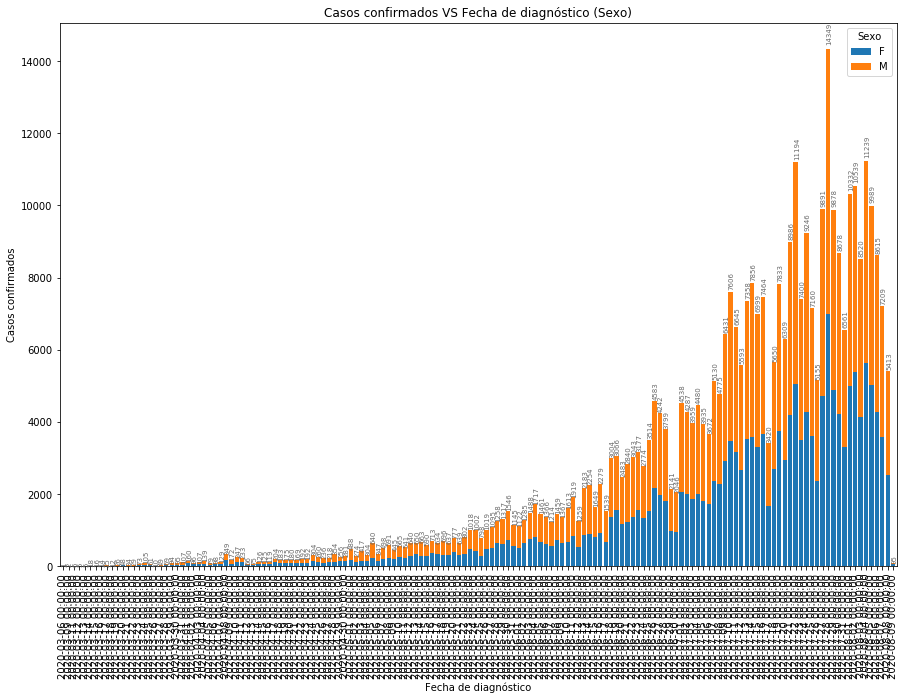

In [27]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)

In [28]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0)

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        0        0        1        1        0   
2020-03-11                  0        0        4        0        0        1   
2020-03-12                  0        0        0        1        1        1   
2020-03-13                  0        0        1        0        2        0   
...                       ...      ...      ...      ...      ...      ...   
2020-08-05                414      702     2286     2306     1613     1321   
2020-08-06                401      663     1901     1943     1382     1131   
2020-08-07                296      545     1673     1652     1120      976   
2020-08-08                212      400     1232     1348      814      709   
2020-08-09                  3        5       24       17       14       14   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        0          0  
2020-03-13                   2        0        0          0  
...                        ...      ...      ...        ...  
2020-08-05                 728      391      193         35  
2020-08-06                 609      377      176         32  
2020-08-07                 513      282      127         25  
2020-08-08                 380      207       96         15  
2020-08-09                  13        3        1          1  

[154 rows x 10 columns]

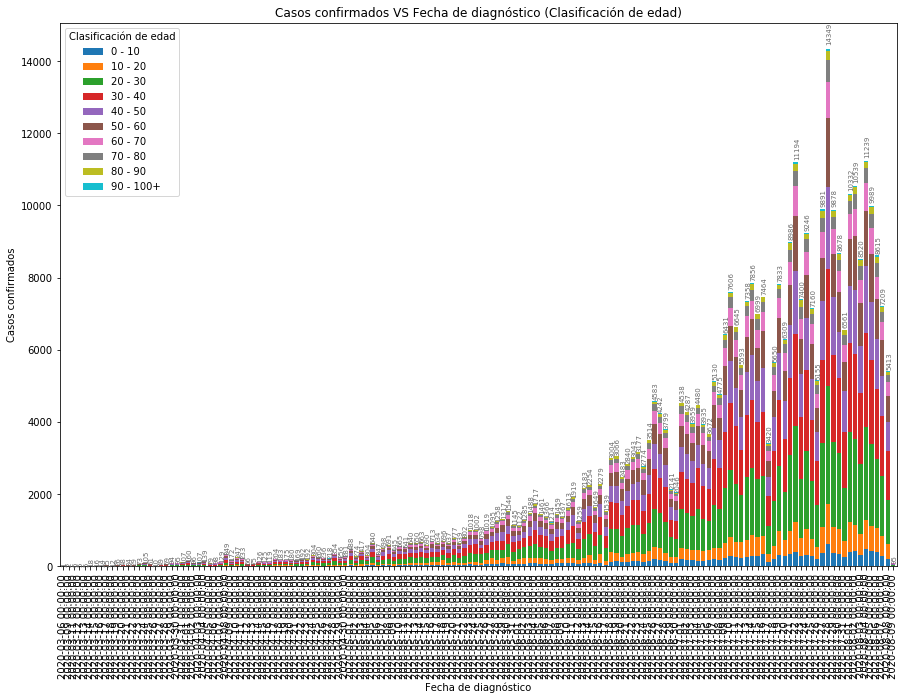

In [29]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados VS Fecha de diagnóstico (Estado)

In [30]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0)

Estado                  Casa  Fallecido  Hospital  Hospital uci  N/a  \
Fecha de diagnóstico                                                   
2020-03-06               0.0        0.0       0.0           0.0  0.0   
2020-03-09               0.0        0.0       0.0           0.0  0.0   
2020-03-11               0.0        0.0       0.0           0.0  0.0   
2020-03-12               0.0        0.0       0.0           0.0  0.0   
2020-03-13               0.0        0.0       0.0           0.0  0.0   
...                      ...        ...       ...           ...  ...   
2020-08-05            9376.0      123.0     468.0          18.0  4.0   
2020-08-06            8053.0      113.0     420.0          21.0  7.0   
2020-08-07            6682.0       86.0     418.0          22.0  1.0   
2020-08-08            5084.0        3.0     304.0          22.0  0.0   
2020-08-09              87.0        0.0       8.0           0.0  0.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   2.0  
2020-03-11                   6.0  
2020-03-12                   5.0  
2020-03-13                   5.0  
...                          ...  
2020-08-05                   0.0  
2020-08-06                   1.0  
2020-08-07                   0.0  
2020-08-08                   0.0  
2020-08-09                   0.0  

[154 rows x 6 columns]

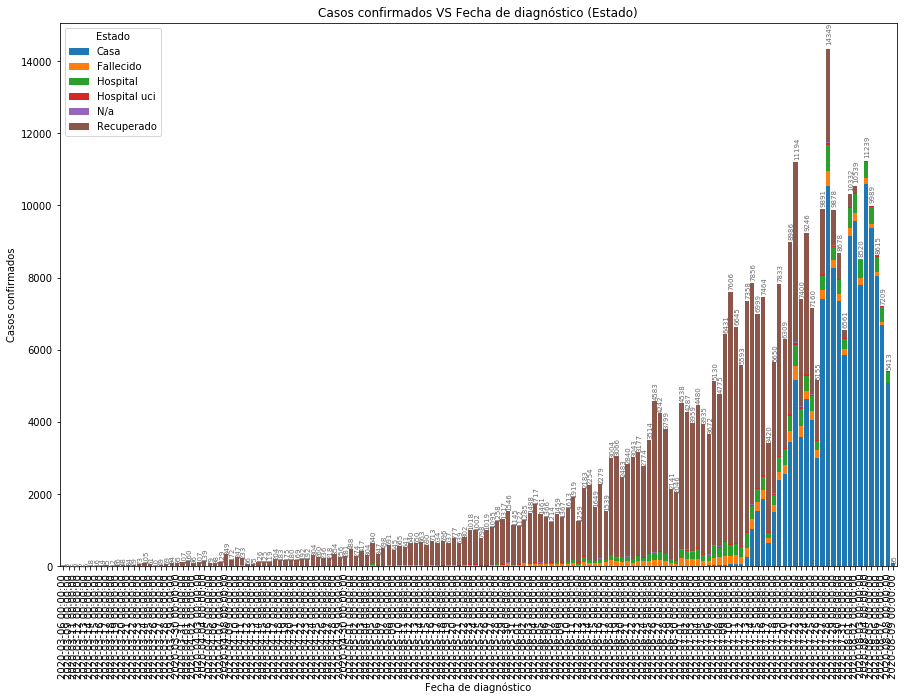

In [31]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados')
div = len(data['Estado'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)

In [32]:
data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum()

Sexo                         F         M
Fecha de diagnóstico                    
2020-03-06                 1.0       0.0
2020-03-09                 2.0       1.0
2020-03-11                 6.0       3.0
2020-03-12                11.0       3.0
2020-03-13                13.0       6.0
...                        ...       ...
2020-08-05            170455.0  189665.0
2020-08-06            174734.0  194001.0
2020-08-07            178311.0  197633.0
2020-08-08            180843.0  200514.0
2020-08-09            180898.0  200554.0

[154 rows x 2 columns]

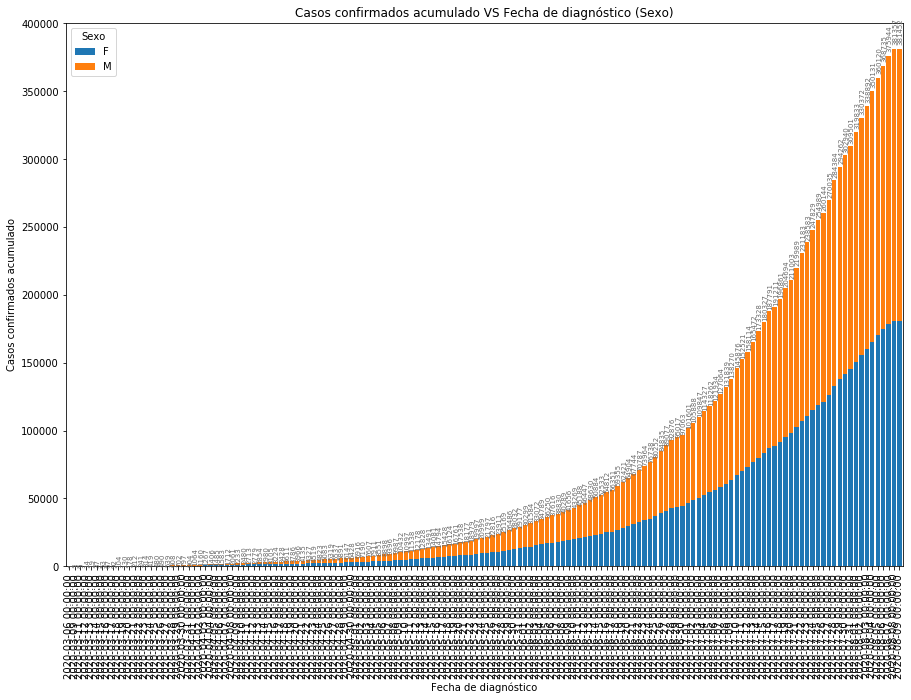

In [33]:
ax = data.groupby(['Fecha de diagnóstico', 'Sexo']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Sexo)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Sexo'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Clasificación de edad)

In [34]:
data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum()

Clasificación de edad  0 - 10  10 - 20  20 - 30  30 - 40  40 - 50  50 - 60  \
Fecha de diagnóstico                                                         
2020-03-06                  0        1        0        0        0        0   
2020-03-09                  0        1        0        1        1        0   
2020-03-11                  0        1        4        1        1        1   
2020-03-12                  0        1        4        2        2        2   
2020-03-13                  0        1        5        2        4        2   
...                       ...      ...      ...      ...      ...      ...   
2020-08-05              14792    26899    83500    83448    56925    46248   
2020-08-06              15193    27562    85401    85391    58307    47379   
2020-08-07              15489    28107    87074    87043    59427    48355   
2020-08-08              15701    28507    88306    88391    60241    49064   
2020-08-09              15704    28512    88330    88408    60255    49078   

Clasificación de edad  60 - 70  70 - 80  80 - 90  90 - 100+  
Fecha de diagnóstico                                         
2020-03-06                   0        0        0          0  
2020-03-09                   0        0        0          0  
2020-03-11                   0        0        1          0  
2020-03-12                   1        1        1          0  
2020-03-13                   3        1        1          0  
...                        ...      ...      ...        ...  
2020-08-05               26124    14152     6776       1256  
2020-08-06               26733    14529     6952       1288  
2020-08-07               27246    14811     7079       1313  
2020-08-08               27626    15018     7175       1328  
2020-08-09               27639    15021     7176       1329  

[154 rows x 10 columns]

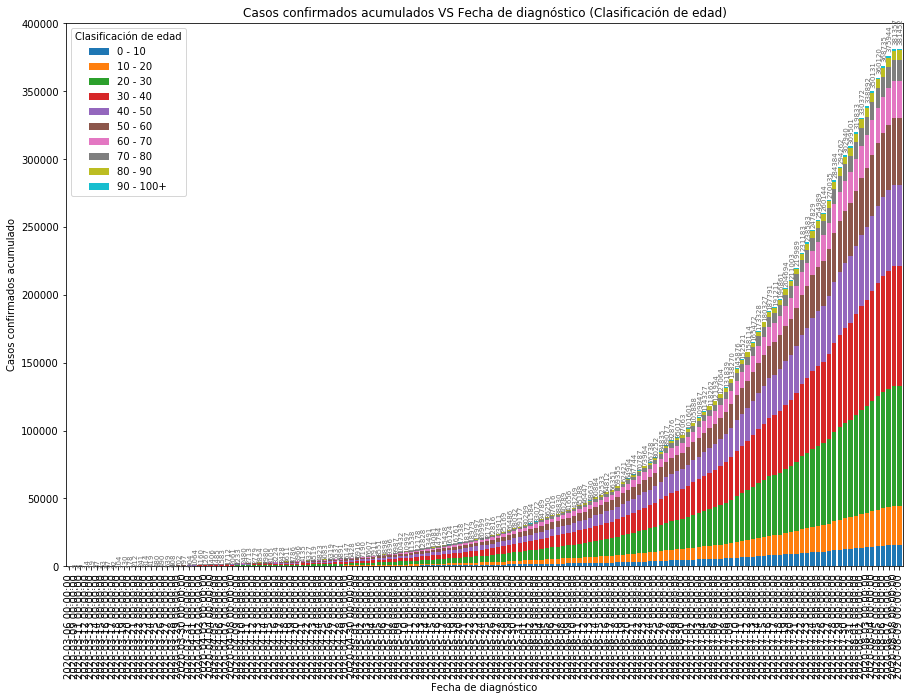

In [35]:
ax = data.groupby(['Fecha de diagnóstico', 'Clasificación de edad']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulados VS Fecha de diagnóstico (Clasificación de edad)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Clasificación de edad'].unique())
numbers(div)

### - Casos confirmados acumulado VS Fecha de diagnóstico (Estado)

In [36]:
data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum()

Estado                    Casa  Fallecido  Hospital  Hospital uci    N/a  \
Fecha de diagnóstico                                                       
2020-03-06                 0.0        0.0       0.0           0.0    0.0   
2020-03-09                 0.0        0.0       0.0           0.0    0.0   
2020-03-11                 0.0        0.0       0.0           0.0    0.0   
2020-03-12                 0.0        0.0       0.0           0.0    0.0   
2020-03-13                 0.0        0.0       0.0           0.0    0.0   
...                        ...        ...       ...           ...    ...   
2020-08-05            122087.0    12232.0   15829.0        1483.0  755.0   
2020-08-06            130140.0    12345.0   16249.0        1504.0  762.0   
2020-08-07            136822.0    12431.0   16667.0        1526.0  763.0   
2020-08-08            141906.0    12434.0   16971.0        1548.0  763.0   
2020-08-09            141993.0    12434.0   16979.0        1548.0  763.0   

Estado                Recuperado  
Fecha de diagnóstico              
2020-03-06                   1.0  
2020-03-09                   3.0  
2020-03-11                   9.0  
2020-03-12                  14.0  
2020-03-13                  19.0  
...                          ...  
2020-08-05              207734.0  
2020-08-06              207735.0  
2020-08-07              207735.0  
2020-08-08              207735.0  
2020-08-09              207735.0  

[154 rows x 6 columns]

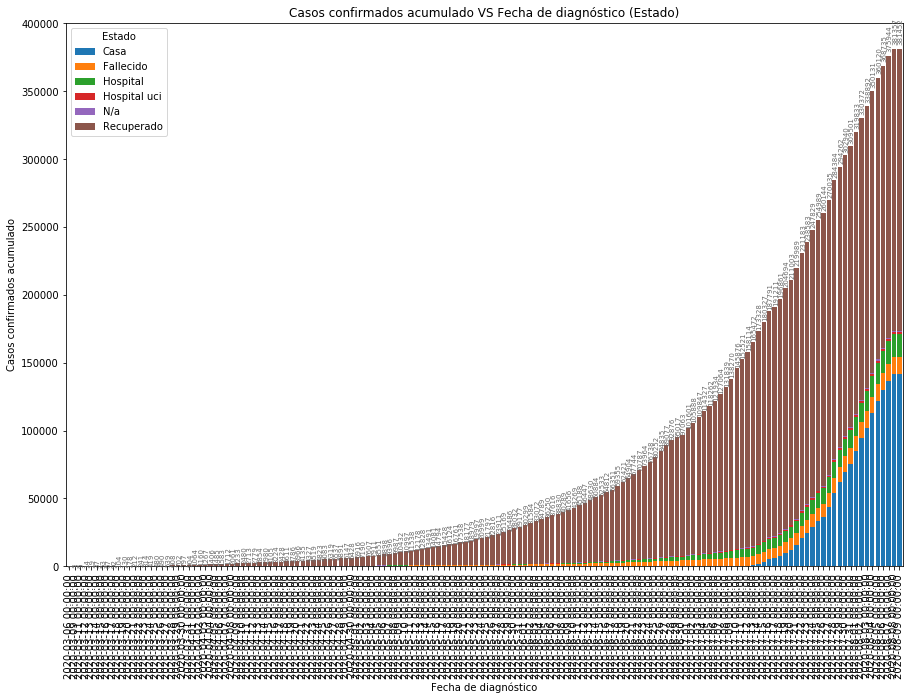

In [37]:
ax = data.groupby(['Fecha de diagnóstico', 'Estado']).size().unstack().fillna(0).cumsum().plot(kind='bar', width=0.8, stacked=True, figsize=(15,10), title=('Casos confirmados acumulado VS Fecha de diagnóstico (Estado)'))
ax.set_ylabel('Casos confirmados acumulado')
div = len(data['Estado'].unique())
numbers(div)

## #StayHome #QuédateEnCasa

### Made with ♥ by <a href='https://github.com/jlcadavid'>@jlcadavid</a>